################################################
# Decision Tree Classification: CART
################################################

 1. Exploratory Data Analysis
 2. Data Preprocessing & Feature Engineering
 3. Modeling using CART
 4. Hyperparameter Optimization with GridSearchCV
 5. Final Model
 6. Feature Importance
 7. Analyzing Model Complexity with Learning Curves (BONUS)
 8. Visualizing the Decision Tree
 9. Extracting Decision Rules
 10. Extracting Python/SQL/Excel Codes of Decision Rules
 11. Prediction using Python Codes
 12. Saving and Loading Model

In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install skompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 1.4 MB/s 
  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54286 sha256=980f97ae593d0abea09bfebab86e22876056e7068bca0509c4d69ff2a4355646
  Stored in directory: /root/.cache/pip/wheels/47/1c/59/b80a730f4afd2144bad854df4b167b812486c9d4c1bd4cf4c5
Successfully built skompiler


In [ ]:
pip install astor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/machine_learning/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

#random_state=1 ortak çıktı elde edilmek için yazıldı özel bir amacı yok

In [ ]:
# Confusion matrix için y_pred:
y_pred = cart_model.predict(X)

In [ ]:
# AUC için y_prob:
y_prob = cart_model.predict_proba(X)[:, 1]

In [ ]:
# Confusion matrix
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



# MODEL BAŞARISI 1 ÇIKTI NASIL YANİ ?? bu terslikte bir iş var gibi :)

## Başarımı nasıl doğru değerlendiririm ??

In [ ]:
# Holdout Yöntemi ile Başarı Değerlendirme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [ ]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [ ]:
# AUC
roc_auc_score(y, y_prob)

1.0

In [ ]:
# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [ ]:
roc_auc_score(y_train, y_prob)

1.0

In [ ]:
# Test Hatası
y_pred = cart_model.predict(X_test)  # modelin hiç görmediği test setini gönderiyoruz
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231



0.6558441558441559

# Model göremediği test setinde çalışınca overfit oldu. ! 

acc değeri : 0.69 iyi de değil kötüde değil

In [ ]:
# CV ile Başarı Değerlendirme
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

#cart_model sonunda fit yazdık o yüzden ezberledi gibi bir soru olabilir fakat cv yöntemi kendi tekrar parçalayıp böldüğü için sorun olmayacaktır.

cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
cv_results['test_accuracy'].mean()

0.7058568882098294

In [ ]:
cv_results['test_f1'].mean()

0.5710621194523633

In [ ]:
cv_results['test_roc_auc'].mean()

0.6719440950384347

In [ ]:
# 4. Hyperparameter Optimization with GridSearchCV
cart_model.get_params()

#overfit önüne geçmek için max_depth ve min_samples_split önemli parametredir!

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [ ]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              scoring="f1",
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [ ]:
cart_best_grid.best_score_

# 0.6395752751155839 bu değer GridSeacrh içindeki scoring dir ön tanımlı olarak accuracy verir. scoring ="f1" de diyip değiştiredebilirsin.
# scoring ="roc_auc" göre yaparsan farklı sonuç alırsın.

0.6395752751155839

In [ ]:
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=2).fit(X, y)

# verbose raporlamanın türünü ifade ediyor. ister verbose=True de ister verbose=1. verbose=2 dersen eşleştirme dökumanı çıkar.
#cart_best_grid  GridSeacrh içinde en iyi modeli saklar

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [ ]:
cart_best_grid.best_score_

0.7500806383159324

In [ ]:
random = X.sample(1, random_state=45)
random

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
195            5      158             84             41      210  39.4                     0.395   29

In [ ]:
cart_best_grid.predict(random)

array([1])

In [ ]:
# 5. Final Model
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)
cart_final
# (cart_best_grid.best_params_) parametreleri var olan modele göre set edebilirim. 

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=17)

In [ ]:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
cv_results #sonuç karışık geldiği için içinden ortalama alıp seçmen gerekiyor

{'fit_time': array([0.01401925, 0.02041006, 0.01624393, 0.00905991, 0.00643492]),
 'score_time': array([0.01883006, 0.01742101, 0.00999808, 0.00844932, 0.00800538]),
 'test_accuracy': array([0.74675325, 0.68831169, 0.75324675, 0.79084967, 0.77124183]),
 'test_f1': array([0.59793814, 0.55555556, 0.59574468, 0.69230769, 0.63157895]),
 'test_roc_auc': array([0.81537037, 0.72333333, 0.80518519, 0.83962264, 0.8054717 ])}

In [ ]:
cv_results['test_accuracy'].mean()

0.7500806383159324

In [ ]:
cv_results['test_f1'].mean()

0.614625004082526

In [ ]:
cv_results['test_roc_auc'].mean()

0.797796645702306

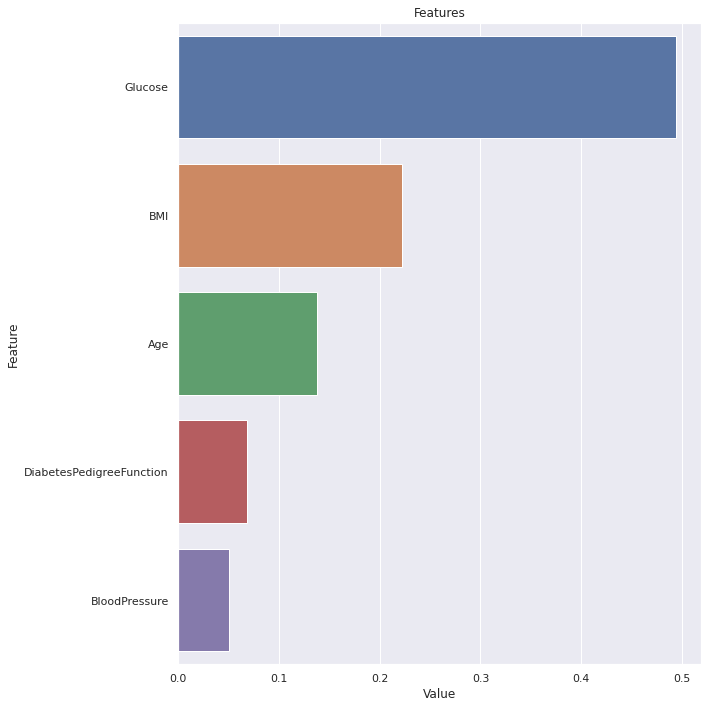

In [ ]:
# 6. Feature Importance
cart_final.feature_importances_

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(cart_final, X, num=5)

In [ ]:
# 7. Analyzing Model Complexity with Learning Curves (BONUS)
train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="roc_auc",
                                           cv=10)

In [ ]:
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

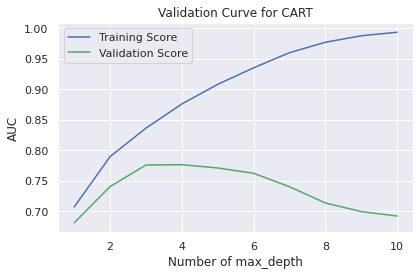

In [ ]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

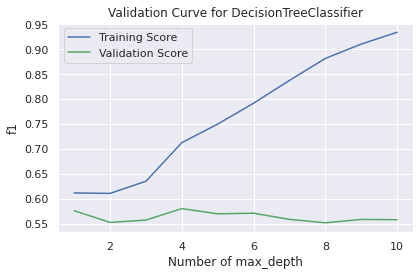

In [ ]:
val_curve_params(cart_final, X, y, "max_depth", range(1, 11), scoring="f1")

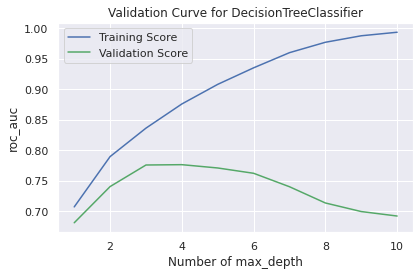

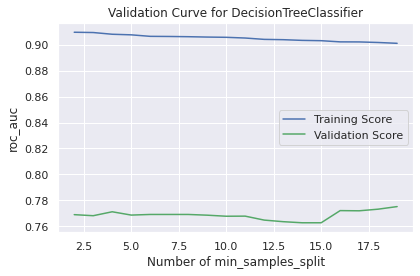

In [ ]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

for i in range(len(cart_val_params)):
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

In [ ]:
# 8. Visualizing the Decision Tree
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [ ]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [ ]:
# 9. Extracting Decision Rules
tree_rules = export_text(cart_final, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

In [ ]:
# 10. Extracting Python Codes of Decision Rules

